#### About Dataset
* This is the data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

* The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.



#### Aim:
* To find out which drug might be appropriate for a future patient with the same illness.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('drug200.csv')

In [3]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [4]:
df.shape

(200, 6)

In [5]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [6]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [7]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [10]:
df['Sex'].replace({'F':0,'M':1},inplace=True)

In [11]:
df['BP'].replace({'LOW':0,'NORMAL':1,'HIGH':2},inplace=True)

In [12]:
df['Cholesterol'].nunique

<bound method IndexOpsMixin.nunique of 0        HIGH
1        HIGH
2        HIGH
3        HIGH
4        HIGH
        ...  
195      HIGH
196      HIGH
197      HIGH
198    NORMAL
199    NORMAL
Name: Cholesterol, Length: 200, dtype: object>

In [13]:
df['Cholesterol'].replace({'NORMAL':0,'HIGH':1},inplace=True)

In [14]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,drugY
1,47,1,0,1,13.093,drugC
2,47,1,0,1,10.114,drugC
3,28,0,1,1,7.798,drugX
4,61,0,0,1,18.043,drugY
...,...,...,...,...,...,...
195,56,0,0,1,11.567,drugC
196,16,1,0,1,12.006,drugC
197,52,1,1,1,9.894,drugX
198,23,1,1,0,14.020,drugX


In [64]:
x=df[['Age','Sex','BP','Cholesterol','Na_to_K']]
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,2,1,25.355
1,47,1,0,1,13.093
2,47,1,0,1,10.114
3,28,0,1,1,7.798
4,61,0,0,1,18.043
...,...,...,...,...,...
195,56,0,0,1,11.567
196,16,1,0,1,12.006
197,52,1,1,1,9.894
198,23,1,1,0,14.020


In [65]:
y=df['Drug']
y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [68]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 5)
(60, 5)
(140,)
(60,)


In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
model = DecisionTreeClassifier()

In [71]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [72]:
y_predict = model.predict(x_test)

In [73]:
y_predict

array(['drugB', 'drugY', 'drugY', 'drugY', 'drugX', 'drugX', 'drugY',
       'drugY', 'drugA', 'drugY', 'drugX', 'drugA', 'drugX', 'drugX',
       'drugY', 'drugX', 'drugX', 'drugX', 'drugY', 'drugC', 'drugA',
       'drugC', 'drugY', 'drugX', 'drugB', 'drugY', 'drugY', 'drugX',
       'drugX', 'drugC', 'drugX', 'drugX', 'drugY', 'drugX', 'drugA',
       'drugY', 'drugX', 'drugX', 'drugA', 'drugX', 'drugX', 'drugY',
       'drugX', 'drugC', 'drugY', 'drugY', 'drugC', 'drugB', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugX', 'drugA', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugY'], dtype=object)

In [74]:
model.score(x_train,y_train)*100

100.0

In [75]:
model.score(x_test,y_test)*100

100.0

#### Observation:
* from the above observation the model is said to be overfitting

In [76]:
df_new = pd.DataFrame({'Actual':y_test,'Predicted':y_predict})

In [77]:
df_new 

,Actual,Predicted
124,drugB,drugB
190,drugY,drugY
122,drugY,drugY
104,drugY,drugY
63,drugX,drugX
167,drugX,drugX
25,drugY,drugY
92,drugY,drugY
78,drugA,drugA
172,drugY,drugY


In [78]:
from sklearn.metrics import accuracy_score

In [79]:
acc=accuracy_score(y_test,y_predict)*100

In [80]:
acc

100.0

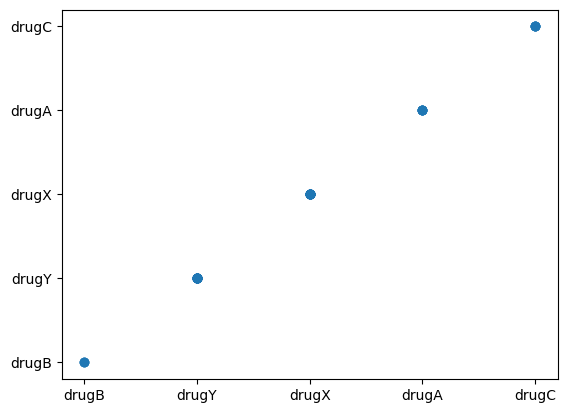

In [81]:
plt.scatter(y_test,y_predict)
plt.show()

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
performance = confusion_matrix(y_test,y_predict)

In [35]:
performance

array([[ 4,  0,  0,  0,  4],
       [ 0,  3,  0,  0,  3],
       [ 0,  0,  1,  0,  1],
       [ 0,  0,  0, 13,  5],
       [ 3,  1,  3,  7, 12]], dtype=int64)

In [36]:
from sklearn.metrics import plot_confusion_matrix

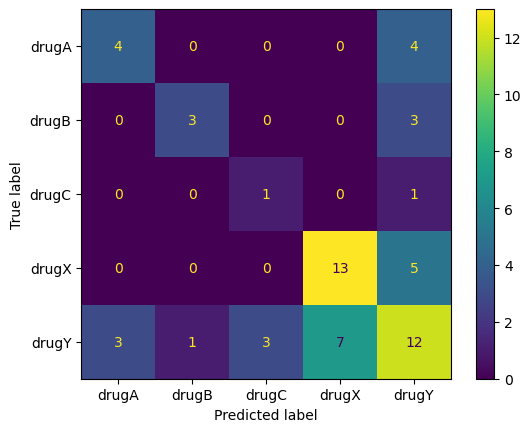

In [37]:
plot_confusion_matrix(model,x_test,y_test)
plt.show()

In [82]:
from sklearn.metrics import classification_report

In [83]:
report =classification_report(y_test,y_predict)

In [84]:
print(report)

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        21
       drugY       1.00      1.00      1.00        25

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [85]:
from sklearn import tree

In [86]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,drugY
1,47,1,0,1,13.093,drugC
2,47,1,0,1,10.114,drugC
3,28,0,1,1,7.798,drugX
4,61,0,0,1,18.043,drugY
...,...,...,...,...,...,...
195,56,0,0,1,11.567,drugC
196,16,1,0,1,12.006,drugC
197,52,1,1,1,9.894,drugX
198,23,1,1,0,14.020,drugX


In [87]:
f=['Age','Sex', 'BP', 'Cholesterol','Na_to_K']

In [88]:
c=['drugA','drugB','drugC','drugX','drugY']

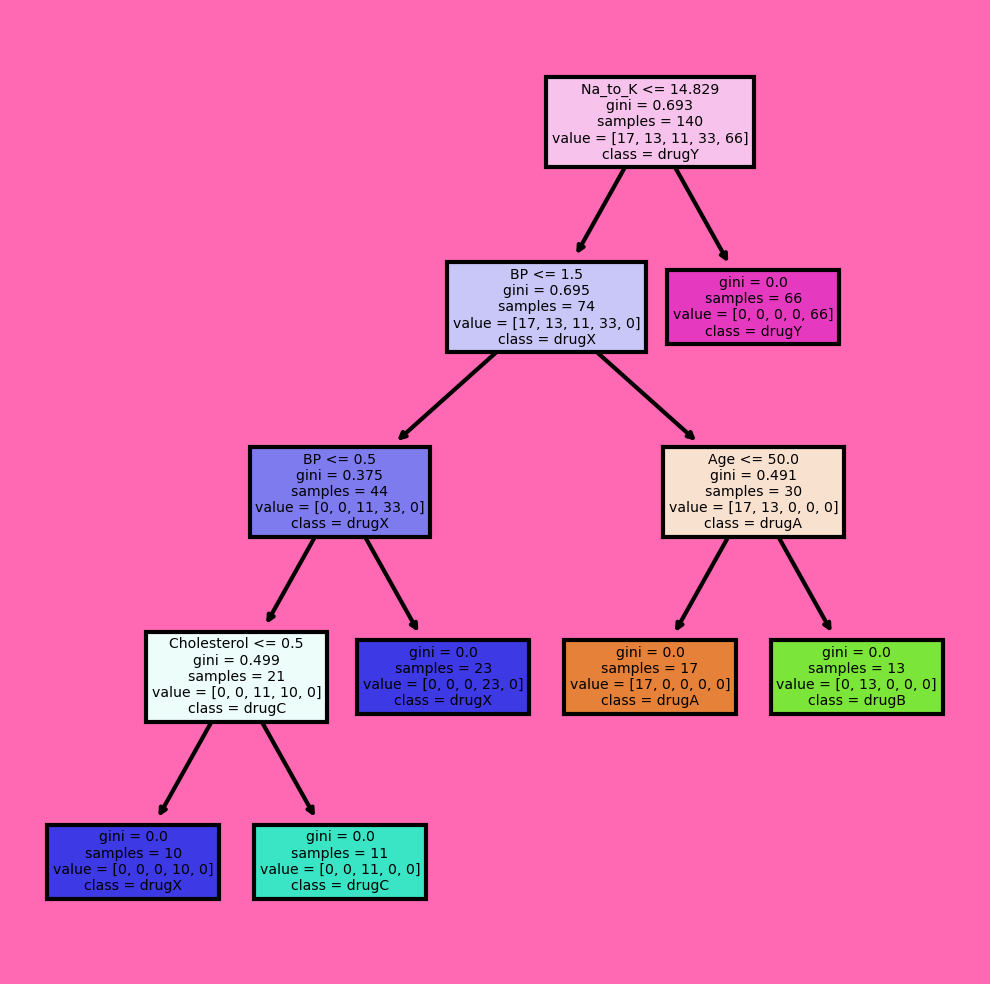

In [92]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300,facecolor='hotpink')
tree.plot_tree(model,feature_names=f,class_names=c,filled=True)
fig.savefig('decision1.png')
plt.show()